<a href="https://colab.research.google.com/github/carlosnylander/TrabalhoML/blob/main/Sample_distribution_and_sampling_distribution_TLC_p_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

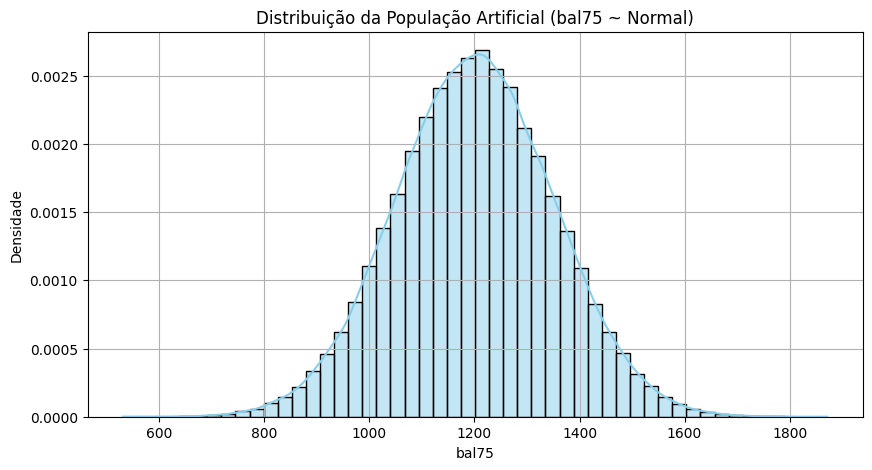

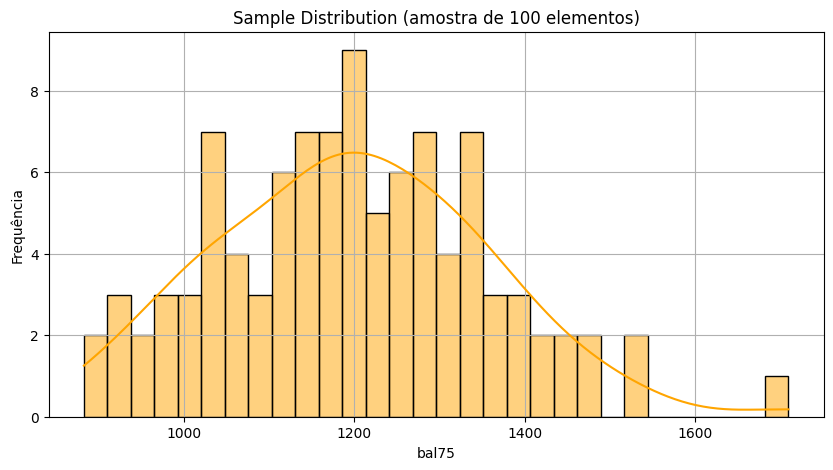

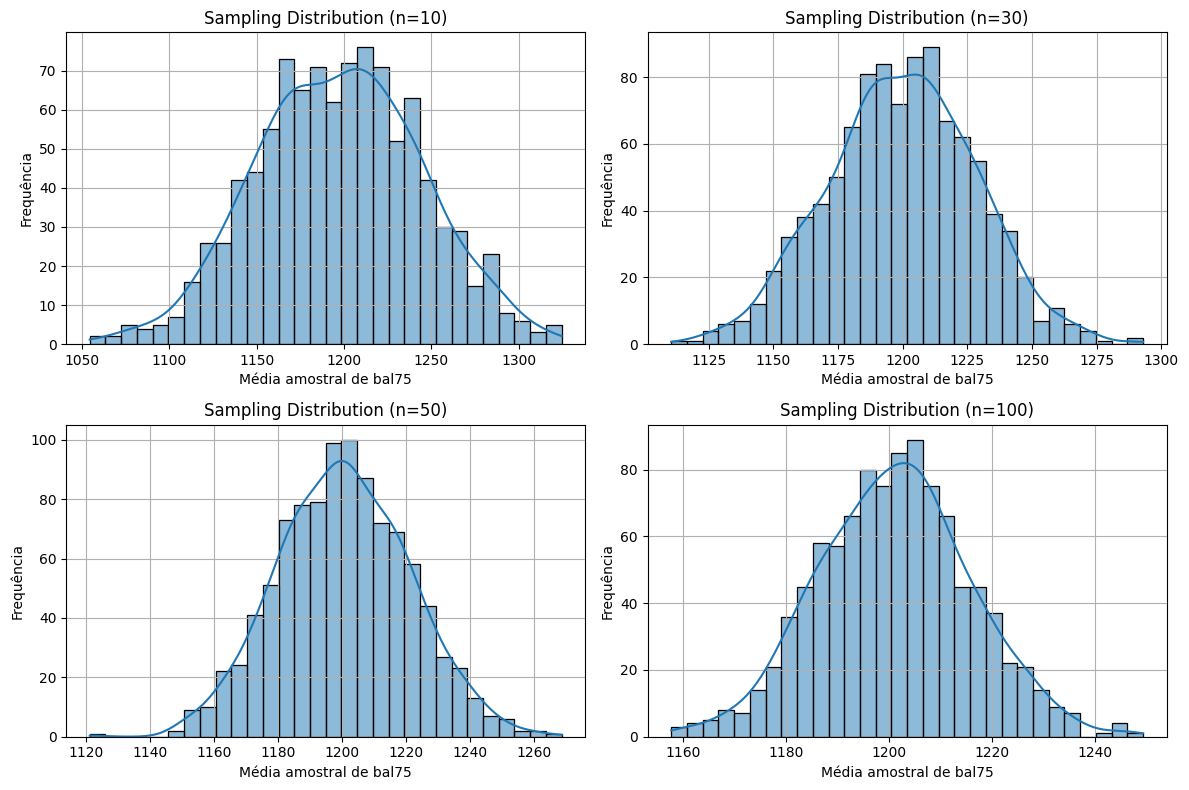

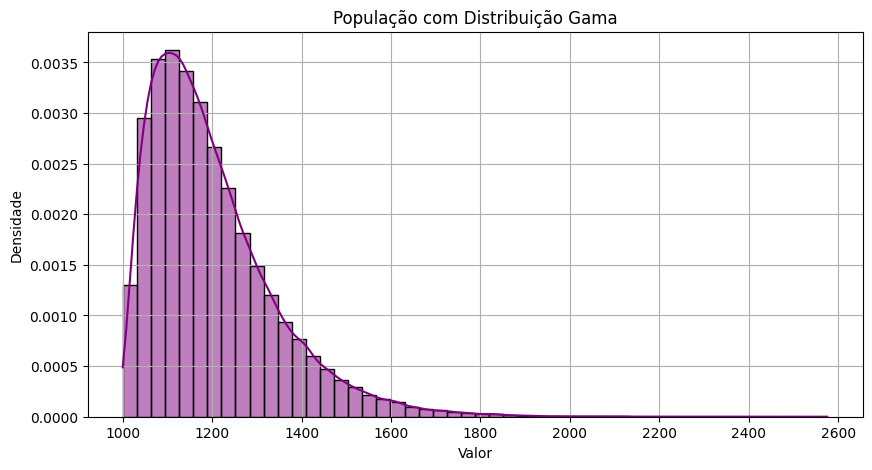

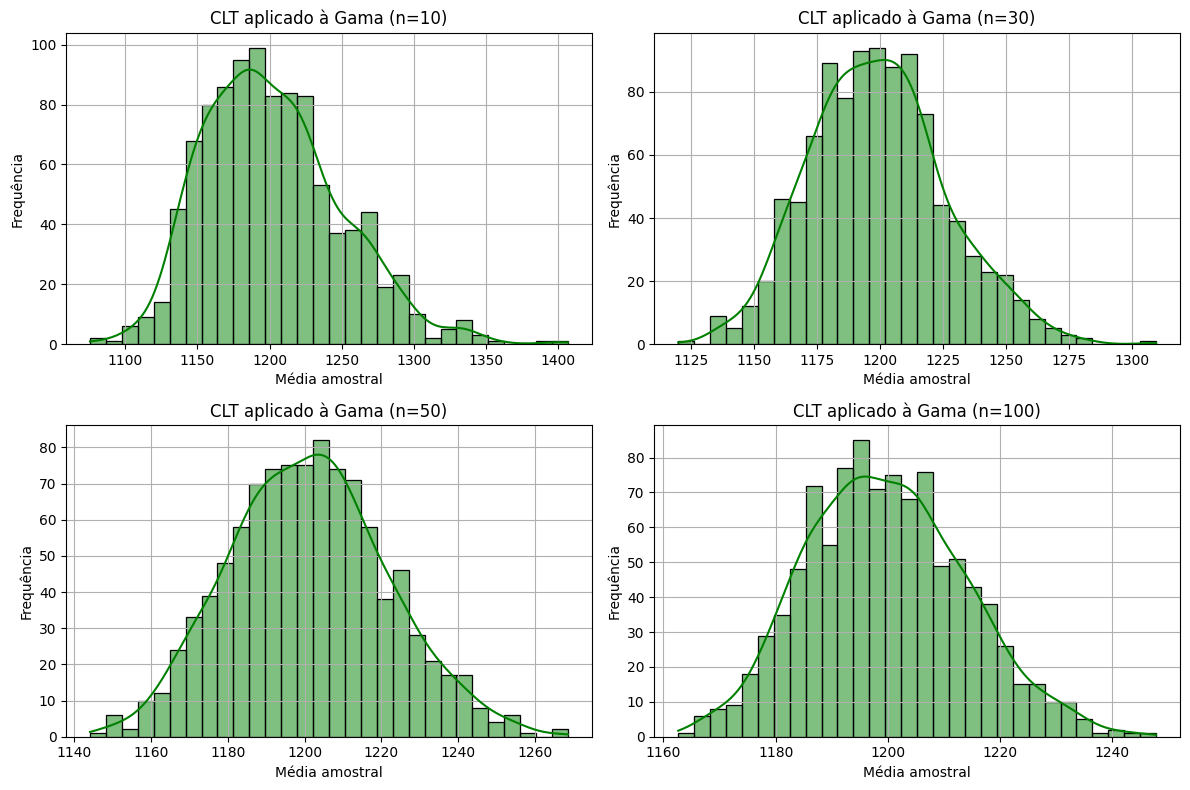

np.float64(0.09121121972586788)

In [ ]:
# Reexecutar após o reset do ambiente: importar bibliotecas e refazer tudo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, gamma

# Criar população artificial com distribuição Gaussiana (baseada em bal75)
np.random.seed(42)
pop_size = 100000
pop_mean = 1200
pop_std = 150
pop_bal75 = np.random.normal(loc=pop_mean, scale=pop_std, size=pop_size)

# Criar DataFrame para análise
df_pop = pd.DataFrame({'bal75': pop_bal75})

# Plotar a distribuição da população artificial
plt.figure(figsize=(10, 5))
sns.histplot(df_pop['bal75'], bins=50, kde=True, stat='density', color='skyblue')
plt.title("Distribuição da População Artificial (bal75 ~ Normal)")
plt.xlabel("bal75")
plt.ylabel("Densidade")
plt.grid(True)
plt.show()

# Cálculo de probabilidade: qual a chance de bal75 > 1400?
prob_maior_1400 = 1 - norm.cdf(1400, loc=pop_mean, scale=pop_std)

# Sample distribution vs Sampling distribution
# Exemplo com amostra simples
sample = np.random.choice(pop_bal75, size=100, replace=False)

plt.figure(figsize=(10, 5))
sns.histplot(sample, bins=30, kde=True, color='orange')
plt.title("Sample Distribution (amostra de 100 elementos)")
plt.xlabel("bal75")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

# Sampling distribution do valor médio com 4 tamanhos diferentes
sample_sizes = [10, 30, 50, 100]
sampling_results = {}

plt.figure(figsize=(12, 8))
for i, size in enumerate(sample_sizes, 1):
    means = [np.mean(np.random.choice(pop_bal75, size=size, replace=False)) for _ in range(1000)]
    sampling_results[size] = means
    plt.subplot(2, 2, i)
    sns.histplot(means, bins=30, kde=True)
    plt.title(f"Sampling Distribution (n={size})")
    plt.xlabel("Média amostral de bal75")
    plt.ylabel("Frequência")
    plt.grid(True)
plt.tight_layout()
plt.show()

# Aplicando Teorema do Limite Central à distribuição Gama
# População não normal
gamma_pop = gamma.rvs(a=2.0, loc=1000, scale=100, size=100000)

# Plot original
plt.figure(figsize=(10, 5))
sns.histplot(gamma_pop, bins=50, kde=True, stat='density', color='purple')
plt.title("População com Distribuição Gama")
plt.xlabel("Valor")
plt.ylabel("Densidade")
plt.grid(True)
plt.show()

# Aplicando CLT para a Gama: médias amostrais
plt.figure(figsize=(12, 8))
for i, size in enumerate(sample_sizes, 1):
    gamma_means = [np.mean(np.random.choice(gamma_pop, size=size, replace=False)) for _ in range(1000)]
    plt.subplot(2, 2, i)
    sns.histplot(gamma_means, bins=30, kde=True, color='green')
    plt.title(f"CLT aplicado à Gama (n={size})")
    plt.xlabel("Média amostral")
    plt.ylabel("Frequência")
    plt.grid(True)
plt.tight_layout()
plt.show()

prob_maior_1400
